In [1]:
import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import itertools
import seaborn as sns
import math
from statistics import mean
import pandas as pd

sns.set_style("white")
sns.set_context("poster")

output_path = "/om/user/shobhita/data/symmetry/figures/"
data_path = '/om/user/shobhita/data/symmetry/'


        

        id: 0,
        name: DATA_CatNS0_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS0'],
        

        

        id: 1,
        name: DATA_CatNS2_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS2'],
        

        

        id: 2,
        name: DATA_CatNS4_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS4'],
        

        

        id: 3,
        name: DATA_CatNS6_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS6'],
        

        

        id: 4,
        name: DATA_CatNSd4_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NSd4'],
        

        

        id: 5,
        name: DATA_CatS0_D0,
        datas

In [2]:
def read_results(net, eid, name, natural=True):
    results_data_generalization = {}
    acc_results = {}

    if net == 'dilation':
        import experiments.dilation as experiments
    elif net == 'lstm3':
        import experiments.LSTM3 as experiments

    output_path = '/om/user/shobhita/data/symmetry/' + net + '/'
    run_opt = experiments.get_experiments(output_path)[eid[0]:eid[1]]
    opt_data = datasets.get_datasets(output_path)

    for opt in run_opt[1:]:
        data_point = {}
        data_point["opt"] = opt

        if not os.path.isfile(opt.log_dir_base + opt.name + name):
            data_point["results"] = "empty"
            print(opt.log_dir_base + opt.name + name)
        else:
            with open(opt.log_dir_base + opt.name + name, 'rb') as f:
                data_point["results"] = pickle.load(f)     

        results_data_generalization[opt.ID] = copy.deepcopy(data_point)
        if natural:
            acc_results[opt.ID] = mean(data_point["results"]['acc'].values())
        else:
            acc_results[opt.ID] = mean(data_point["results"].values())

    return results_data_generalization, acc_results

In [3]:
def read_results(net, eid, name, for_datasets=None):
    results_data_generalization = {}
    acc_results = {}

    if net == 'dilation':
        import experiments.dilation as experiments
    elif net == 'lstm3':
        import experiments.LSTM3 as experiments

    output_path = data_path + net + '/'
    run_opt = experiments.get_experiments(output_path)[eid[0]:eid[1]]
    opt_data = datasets.get_datasets(output_path)

    for opt in run_opt:
        data_point = {}
        data_point["opt"] = opt

        if not os.path.isfile(opt.log_dir_base + opt.name + name):
            data_point["results"] = "empty"
            print(opt.log_dir_base + opt.name + name)
        else:
            with open(opt.log_dir_base + opt.name + name, 'rb') as f:
                data_point["results"] = pickle.load(f)     

        results_data_generalization[opt.ID] = copy.deepcopy(data_point)
        
        try:
            accs = data_point["results"]['acc']
        except:
            accs = data_point["results"]
        
        if accs == "empty" or not accs:
            continue
        
        if for_datasets is not None:
            accs = {ds: acc for ds, acc in accs.items() if ds in for_datasets}
        
        acc_results[opt.ID] = mean(accs.values())

    return results_data_generalization, acc_results
def get_max_acc_results(net, eid, name, num):
    results, acc_results = read_results(net, eid, name)
    max_acc_res = results[0]
    for res in results[1:]:
        if mean(list(res['results'].values())) > mean(list(max_acc_res['results'].values())):
            max_acc_res = res
    return max_acc_res     

# Validation accuracy

In [5]:
net = "lstm3"
eid = (354, 385)
name = "/results/intra_dataset_accuracy.pkl"

intra_results_lstm, intra_accs_lstm = read_results(net, eid, name)
intra_accs_lstm # Max validation acc is 373

/om/user/shobhita/data/symmetry/lstm3/ID383_LSTM3_D116/results/intra_dataset_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID384_LSTM3_D116/results/intra_dataset_accuracy.pkl


{354: 0.5032249742002064,
 355: 0.4967750257997936,
 356: 0.5032249742002064,
 357: 0.4967750257997936,
 358: 0.4967750257997936,
 359: 0.4967750257997936,
 360: 0.4967750257997936,
 361: 0.4967750257997936,
 362: 0.4967750257997936,
 363: 0.5032249742002064,
 364: 0.5032249742002064,
 365: 0.5032249742002064,
 366: 0.5032249742002064,
 367: 0.5032249742002064,
 368: 0.5032249742002064,
 369: 0.5032249742002064,
 370: 0.5032249742002064,
 371: 0.5032249742002064,
 372: 0.5032249742002064,
 373: 0.9679115067079463,
 374: 0.9066692466460268,
 375: 0.955140608875129,
 376: 0.919859391124871,
 377: 0.9673955108359132,
 378: 0.787796697626419,
 379: 0.8427180082559339,
 380: 0.8673568111455108,
 381: 0.8801922084623323,
 382: 0.9598490712074303}

In [4]:
net = "dilation"
eid = (380, 397)
name = "/results/intra_dataset_accuracy.pkl"

intra_results_dilated, intra_accs_dilated = read_results(net, eid, name)
intra_accs_dilated # Max validation acc is 395

{380: 0.5032249742002064,
 381: 0.5032249742002064,
 382: 0.4967750257997936,
 383: 0.9950980392156863,
 384: 0.9993872549019608,
 385: 0.5032249742002064,
 386: 0.5032249742002064,
 387: 0.4967750257997936,
 388: 0.4967750257997936,
 389: 1.0,
 390: 0.9981617647058824,
 391: 0.5032249742002064,
 392: 0.5032249742002064,
 393: 0.5032249742002064,
 394: 0.4967750257997936,
 395: 0.9980972652218782,
 396: 0.9981617647058824}

In [5]:
LSTM_ID = 373
DILATED_ID = 389

# Natural Data Test

In [6]:
net = "lstm3"
eid = (354, 385)
name = "/results/generalization_accuracy_natural.pkl"

full_results_lstm_nat, accs_lstm_nat = read_results(net, eid, name)
accs_lstm_nat[LSTM_ID]

/om/user/shobhita/data/symmetry/lstm3/ID383_LSTM3_D116/results/generalization_accuracy_natural.pkl
/om/user/shobhita/data/symmetry/lstm3/ID384_LSTM3_D116/results/generalization_accuracy_natural.pkl


0.912828947368421

In [7]:
net = "dilation"
eid = (380, 397)
name = "/results/generalization_accuracy_natural.pkl"

full_results_dilation_nat, accs_dilation_nat = read_results(net, eid, name)
accs_dilation_nat[DILATED_ID]

0.884046052631579

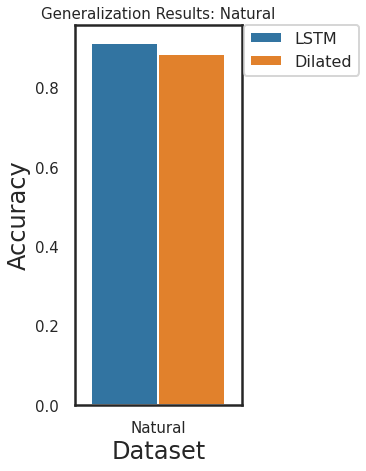

In [8]:
df = pd.DataFrame({"Accuracy": [accs_lstm_nat[LSTM_ID], accs_dilation_nat[DILATED_ID]], "Dataset": ["Natural", "Natural"], "Network": ["LSTM", "Dilated"]})
fig, ax = plt.subplots(figsize=(3,7))
sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=df, ax=ax)
ax.set_title("Generalization Results: Natural", fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={"size": 16})

In [9]:
lstm_probs = np.concatenate(full_results_lstm_nat[LSTM_ID]["results"]["probs"][114])
lstm_preds = np.argmax(lstm_probs, axis=1)
lstm_labels = np.concatenate(full_results_lstm_nat[LSTM_ID]["results"]["labels"][114])
lstm_ims = np.concatenate(full_results_lstm_nat[LSTM_ID]["results"]["images"][114])

lwrong_labels = lstm_labels[lstm_labels != lstm_preds]
lwrong_ims = lstm_ims[lstm_labels != lstm_preds]

lright_labels = lstm_labels[lstm_labels == lstm_preds]
lright_ims = lstm_ims[lstm_labels == lstm_preds]

print("Wrong ims: {}% symmetric".format(sum(lwrong_labels)/len(lwrong_labels)))

Wrong ims: 0.6226415094339622% symmetric


In [10]:
dilation_probs = np.concatenate(full_results_dilation_nat[DILATED_ID]["results"]["probs"][114])
dilation_preds = np.argmax(dilation_probs, axis=1)
dilation_labels = np.concatenate(full_results_dilation_nat[DILATED_ID]["results"]["labels"][114])
dilation_ims = np.concatenate(full_results_dilation_nat[DILATED_ID]["results"]["images"][114])

dwrong_labels = dilation_labels[dilation_labels != dilation_preds]
dwrong_ims = dilation_ims[dilation_labels != dilation_preds]

dright_labels = dilation_labels[dilation_labels == dilation_preds]
dright_ims = dilation_ims[dilation_labels == dilation_preds]

print("Wrong ims: {}% symmetric".format(sum(dwrong_labels)/len(dwrong_labels)))

Wrong ims: 0.6028368794326241% symmetric


In [11]:
lwrong_symm = lwrong_ims[lwrong_labels == 1]
lright_symm = lright_ims[lright_labels == 1]

dwrong_symm = dwrong_ims[dwrong_labels == 1]
dright_symm = dright_ims[dright_labels == 1]

In [12]:
from skimage.metrics import structural_similarity as ssim
from scipy.spatial import distance

def get_image_metrics(ims):
    results = {"corr": [], "euclidean": [], "ssim": []}
    for image in ims:
        left = image[:, :10].flatten()
        right = np.flip(image[:,10:], axis=1).flatten()
        
        corr = np.corrcoef(left, right)[0][1]
        dist1 = distance.cdist([left], [right], "euclidean")[0][0]        
        ssim_dist = ssim(left, right, data_range=left.max()-right.min())
        
        results['corr'].append(corr)
        results['euclidean'].append(dist1)
        results['ssim'].append(ssim_dist)
    return pd.DataFrame(results)

def longform(metric_df):
    corr = pd.DataFrame(metric_df["corr"])
    dist = pd.DataFrame(metric_df["euclidean"])
    ssim = pd.DataFrame(metric_df["ssim"])
    corr = corr.rename(columns={"corr": "metric"})
    dist = dist.rename(columns={"euclidean": "metric"})
    ssim = ssim.rename(columns={"ssim": "metric"})
    corr["type"] = "Corr"
    dist["type"] = "Euclidean"
    ssim["type"] = "SSIM"
    long = pd.concat([corr, dist, ssim])
    return long

In [13]:
lright_metrics = get_image_metrics(lright_symm)
lwrong_metrics = get_image_metrics(lwrong_symm)

dright_metrics = get_image_metrics(dright_symm)
dwrong_metrics = get_image_metrics(dwrong_symm)

In [14]:
lright_long = longform(lright_metrics)
lwrong_long = longform(lwrong_metrics)
lright_long["class"] = "Symmetric Correct"
lwrong_long["class"] = "Symmetric Wrong"
lmetrics = pd.concat([lright_long, lwrong_long])

dright_long = longform(dright_metrics)
dwrong_long = longform(dwrong_metrics)
dright_long["class"] = "Symmetric Correct"
dwrong_long["class"] = "Symmetric Wrong"
dmetrics = pd.concat([dright_long, dwrong_long])


Text(0.5, 1.0, 'Naturally Trained LSTM: \nErrors on Natural Images')

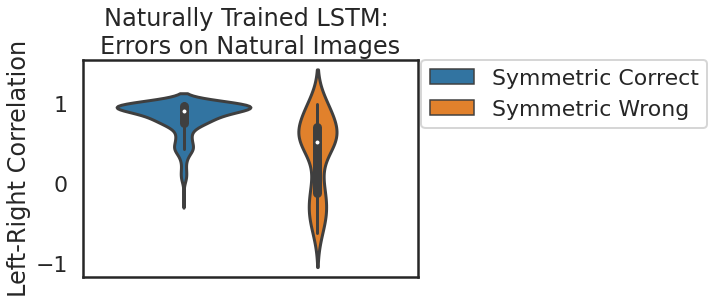

In [15]:
metric_type = "Corr"
s = sns.violinplot(x = "type", y = "metric", hue="class", data=lmetrics[lmetrics["type"] == metric_type])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
s.set_xticklabels([""])
s.set_xlabel("")
s.set_ylabel("Left-Right Correlation")
s.set_title("Naturally Trained LSTM: \nErrors on Natural Images")

In [1]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='dodgerblue', label='Label1')
black_patch = mpatches.Patch(color='teal', label='Label2')
metric_type = "Corr"
data = lmetrics[lmetrics["type"] == metric_type]

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

# bins = np.arange(-1, 1)

for ax, typex, color, invert in zip(axes.ravel(), lmetrics["class"].unique(), ['dodgerblue', 'teal'],  [False,True]):
    
    if invert:
        sns.histplot(data[data["class"] == typex]["metric"], color=color, ax=ax, binwidth=0.1)
#         sns.histplot(data[data["class"] == typex]["metric"], color=color, ax=ax)
        ax.set_ylabel("")
        ax.invert_yaxis()
    else:
        sns.histplot(data[data["class"] == typex]["metric"], color=color, ax=ax, binwidth=0.1)
        ax.set_ylabel("")
        ax.set_title("Naturally Trained LSTM: \nErrors on Natural Images")
        
plt.subplots_adjust(hspace=0)
plt.xlabel("Left-Right Image Correlation")
fig.text(-0.09, 0.5, 'Count', va='center', rotation='vertical')
plt.legend(handles=[red_patch, black_patch], labels = ["Symmetric Correct", "Symmetric Incorrect"], bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)


NameError: name 'lmetrics' is not defined

Text(0.5, 1.0, 'Naturally Trained Dilated: \nErrors on Natural Images')

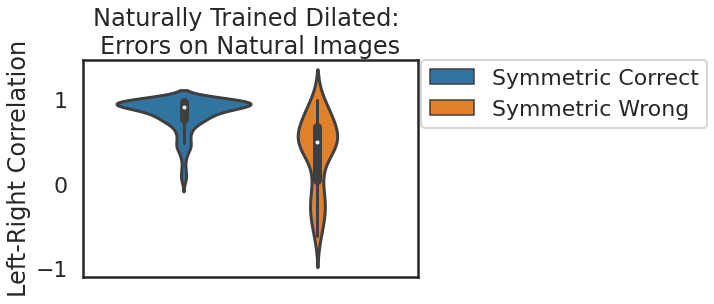

In [59]:
metric_type = "Corr"
s = sns.violinplot(x = "type", y = "metric", hue="class", data=dmetrics[dmetrics["type"] == metric_type])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
s.set_xticklabels([""])
s.set_xlabel("")
s.set_ylabel("Left-Right Correlation")
s.set_title("Naturally Trained Dilated: \nErrors on Natural Images")

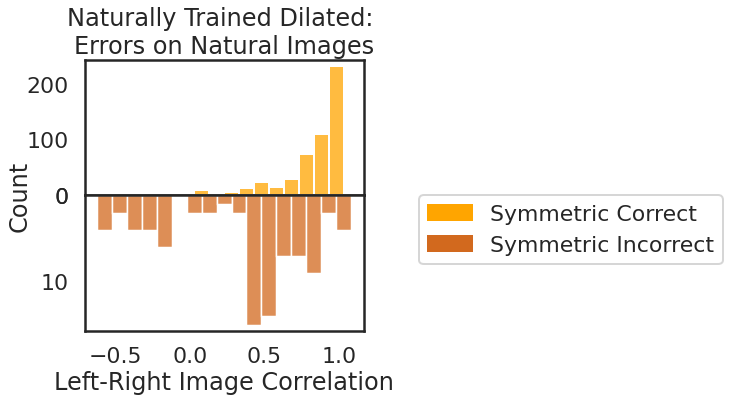

In [126]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='orange', label='Label1')
black_patch = mpatches.Patch(color='chocolate', label='Label2')
metric_type = "Corr"
data = dmetrics[dmetrics["type"] == metric_type]

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

# bins = np.arange(-1, 1)

for ax, typex, color, invert in zip(axes.ravel(), dmetrics["class"].unique(), ['orange', "chocolate"],  [False,True]):
    
    if invert:
        sns.histplot(data[data["class"] == typex]["metric"], color=color, ax=ax, binwidth=0.1)
#         sns.histplot(data[data["class"] == typex]["metric"], color=color, ax=ax)
        ax.set_ylabel("")
        ax.invert_yaxis()
    else:
        sns.histplot(data[data["class"] == typex]["metric"], color=color, ax=ax, binwidth=0.1)
        ax.set_ylabel("")
        ax.set_title("Naturally Trained Dilated: \nErrors on Natural Images")
        
plt.subplots_adjust(hspace=0)
plt.xlabel("Left-Right Image Correlation")
fig.text(-0.09, 0.5, 'Count', va='center', rotation='vertical')
plt.legend(handles=[red_patch, black_patch], labels = ["Symmetric Correct", "Symmetric Incorrect"], bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)



# Synthetic Data Test

In [19]:
net = "lstm3"
eid = (354, 385)
name = "/results/generalization_accuracy_synthetic.pkl"

full_results_lstm, accs_lstm = read_results(net, eid, name, natural=False)


In [20]:
net = "dilation"
eid = (380, 397)
name = "/results/generalization_accuracy_synthetic.pkl"

full_results_dilation, accs_dilation = read_results(net, eid, name, natural=False)


In [21]:
def plot(ds, size=(10,5)):
    df = pd.DataFrame()
    
    for d, idx in ds.items():
        lstm_res = []
        dilated_res = []
        for i in idx:
            lstm_r = 1-full_results_lstm[LSTM_ID]['results'][i] if 58 < i < 83 else full_results_lstm[LSTM_ID]['results'][i]
            dilated_r = 1-full_results_dilation[DILATED_ID]['results'][i] if 58 < i < 83 else full_results_dilation[DILATED_ID]['results'][i]
            lstm_res.append(lstm_r)
            dilated_res.append(dilated_r)
        lstm_acc = mean(lstm_res)
        dilated_acc = mean(dilated_res)
        df = df.append({'acc': lstm_acc, 'network': 'lstm', 'dataset': d}, ignore_index=True)
        df = df.append({'acc': dilated_acc, 'network': 'dilated', 'dataset': d}, ignore_index=True)

    fig, ax = plt.subplots(figsize=size)
    sns.barplot(x="dataset", y="acc", hue="network", data=df, ax=ax)
    ax.set_title("Generalization Results: Synthetic", fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={"size": 16})

### Band Datasets

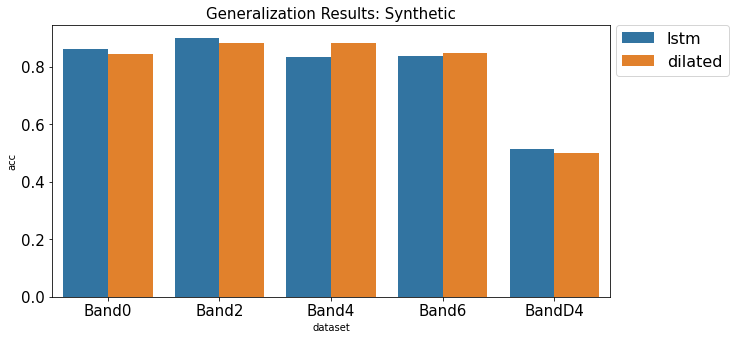

In [22]:
names = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
ds1 = {names[i]: [j] for i, j in enumerate(range(20, 30))}
ds2 = {"Band0": [20, 25], "Band2": [21, 26], "Band4": [22, 27], "Band6": [23, 28], "BandD4": [24, 29]}
plot(ds2)

### Flank Datasets

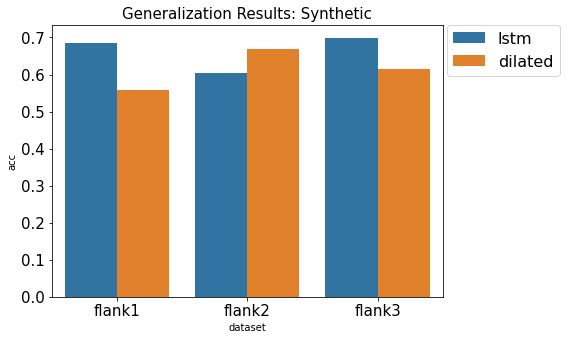

In [23]:
names = ["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]
ds1 = {names[i]: [j] for i, j in enumerate(range(45, 51))}
ds2 = {"flank1": [45, 48], "flank2": [46, 49], "flank3": [47, 50]}

plot(ds2, size=(7, 5))

### Stripe datasets

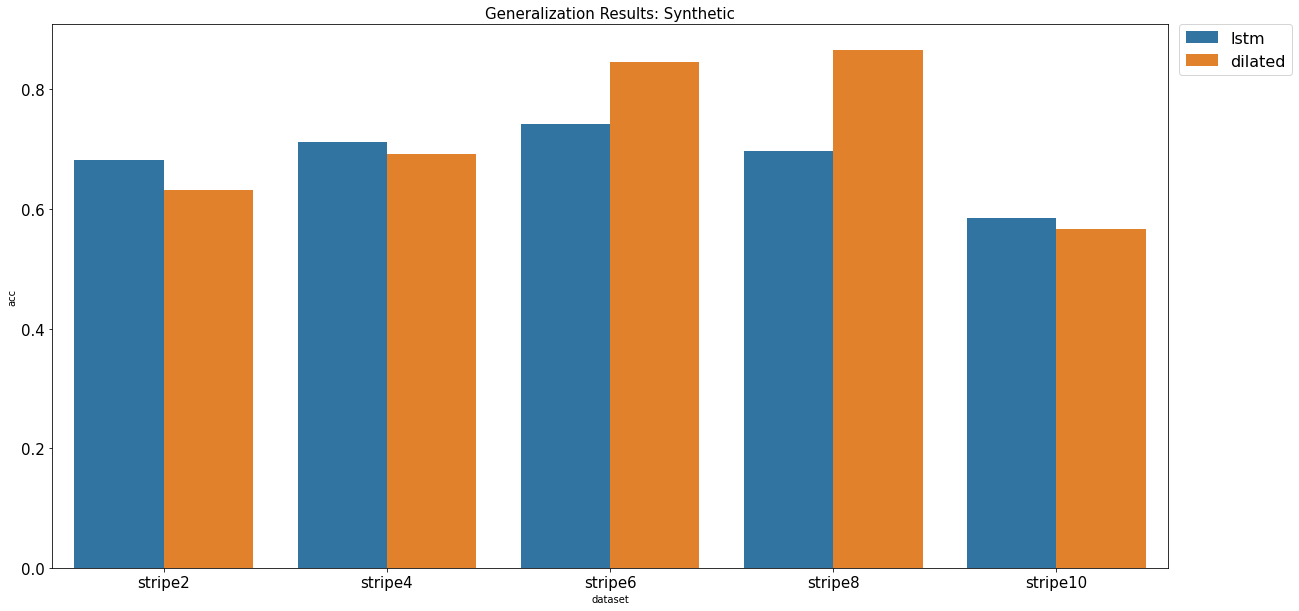

In [24]:
names = ["stripe2S", "stripe4S", "stripe6S", "stripe8S", "stripe10S", "stripe2NS", "stripe4NS", "stripe6NS", "stripe8NS", "stripe10NS"]
ds1 = {names[i]: [j] for i, j in enumerate(range(83, 93))}
ds2 = {"stripe2": [83, 88], "stripe4": [84, 89], "stripe6": [85, 90], "stripe8": [86, 91], "stripe10": [87, 92]}

plot(ds2, (20,10))

In [ ]:
# Take top 5 validation accuracy networks

1


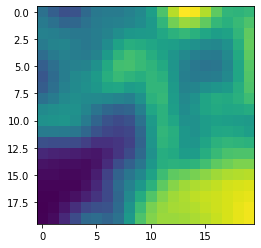

In [78]:
idx = 9
print(wrong_labels[idx])
plt.imshow(wrong_ims[idx])

In [35]:
full_results_dilation[391]

{'opt': <experiments.dilation.Experiments at 0x2b78d30737b8>,
 'results': {'acc': {114: 0.5016447368421053},
  'probs': {114: [array([[1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.0000000e+00, 1.0043935e-21],
           [1.000